In [24]:
#fichiers contenant les fonctions utiles
import pandas as pd
from premiere_analyse import *
from testZ import *
import matplotlib.pyplot as plt
import matplotlib.axes as ma
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as sto
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set_style("white")

In [25]:
#données de la campagne
folder = 'C:/Users/Admin/Documents/Centrale Paris/3A/OMA/Projet 1000mercis/Donnees/'
annonceur = 'annonceur1/annonceur1'
campagne = 'annonceur1_campaign1_visite_2pages'
data = pd.read_hdf(folder + annonceur + '.hdf', key=campagne)
data = data.reset_index()

### 1. Tracer la différence relative entre les taux de conversion des groupes A et B en fonction du temps pour la campagne.

#### a. Différence relative des taux de conversion par jour, semaine et mois

In [3]:
freq_list = ["1D", "1W", "1M"]

conv_rate = {}
pct_change = {}
conv_count = {}

for freq in freq_list:
    conv_count[freq] = conversion_count_resample(data, freq)
    conv_rate[freq] = conversion_rate_resample(data, freq)
    pct_change[freq] = (conv_rate[freq]["A"] - conv_rate[freq]["B"]) / conv_rate[freq]["B"]


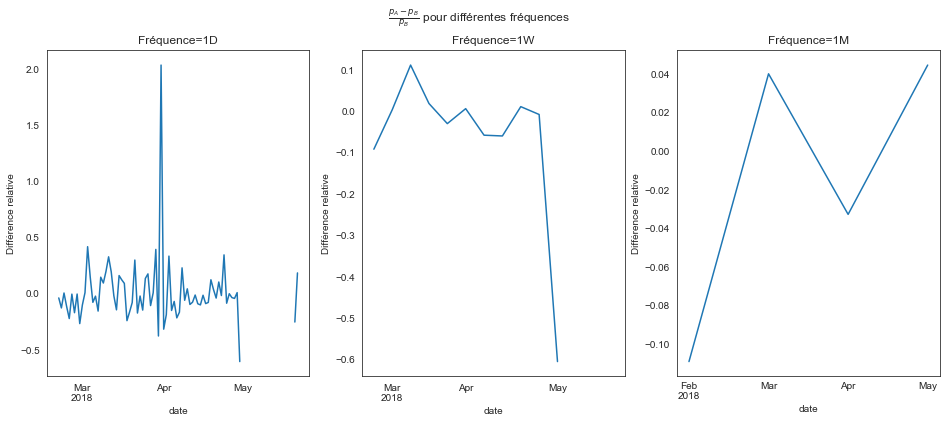

In [4]:
# trace des variations relatives du taux de conversion entre A et B pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    pct_change[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Différence relative')
plt.suptitle('$\\frac{p_A - p_B}{p_B}$ pour différentes fréquences')
plt.show()

Ci-dessus sont tracés les séries de la différence relative du taux de conversion entre A et B. Les trois graphiques correspondent respectivement à une agrégation du taux de conversion par jour, par semaine et par mois.
Ces tracés permettent d’avoir une première visualisation rapide des données et d’observer les
particularités, les différences facilement notables. Il s’agit en fait d’avoir une première idée de ce que l’on manipule.
L'utilisation de différents niveaux d'agrégation permet de comparer les taux à ces différentes échelles et de déterminer laquelle est la plus intéressante pour notre étude.

Ici, on remarque des grandes différences entre les différents niveaux d'agrégation, liées majoritairement au nombre de points disponibles. Le taux moyen par jour semble présenter une composante périodique alors que les taux par semaine et par mois manquent de points pour l'analyse.

#### b. Pattern journalier/hebdomadaire/mensuel sur la différence relative des taux journaliers?

In [5]:
dataA, dataB = preparer(data)

Conversion des index en dates
Moyennes des taux par jour et séparation en deux groupes A et B


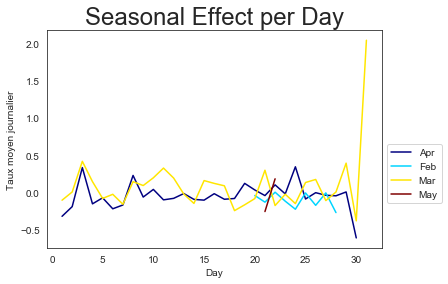

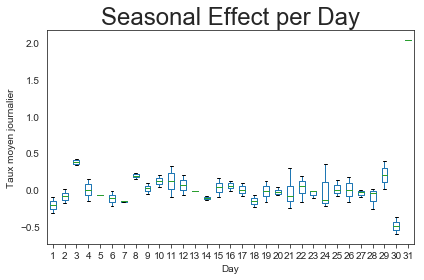

In [7]:
diff = (dataA['is_conv'] - dataB['is_conv']) /dataB['is_conv']
diff.index = pd.to_datetime(diff.index)
diff = pd.Series.to_frame(diff)
effet_journalier(diff)

Le premier graphe correspond au tracé de la série pour les différents mois afin de pouvoir les observer chacun séparément et d'identifier un motif commun s'il en est. Le second graphe présente les boxplots des taux de conversion par jour pour chaque jour du mois (par exemple, le premier boxplot est le boxplot des valeurs du 1er février, 1er mars, 1er avril et 1er mai).

Il est à noter que les mois n'ont pas le même nombre de jours et qu'il y a des données manquantes ce qui perturbe l'analyse.

On peut toutefois deviner un motif de fin et début de mois où le taux semble augmenter légèrement. Cela peut s'expliquer par le fait que les budgets des campagnes se décident en fin/début de mois et donc c'est à ce moment qu'une nouvelle campagne peut se lancer. Il faudrait davantage de données pour confirmer ce pattern.

### 2. Z_test et P_value cumulées

#### a. Pas d'un jour

In [9]:
Z_cum, P_rej, p_cum = testZ_cum(data)

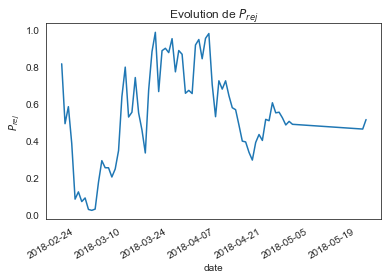

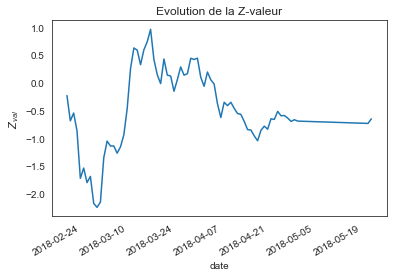

In [10]:
P_rej.plot(title='Evolution de $P_{rej}$', ax=plt.gca())
plt.ylabel('$P_{rej}$')
plt.show()


Z_cum.plot(title='Evolution de la Z-valeur', ax=plt.gca())
plt.ylabel('$Z_{val}$')
plt.show()

Nous tracons les graphiques des P-valeur et Z-valeur en fonction du temps, ceci nous permet d'avaluer la significativité du test au cours du temps puisque celle-ci dépend précisément de ces deux valeurs.

Nous n'observons ici pas de stabilisation (la ligne droite correspond à l'abscence de point) ni de Z, ni de P.

### 3. Évolution de la significativité du test

#### a. Significativité à 90%

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier :
8.3


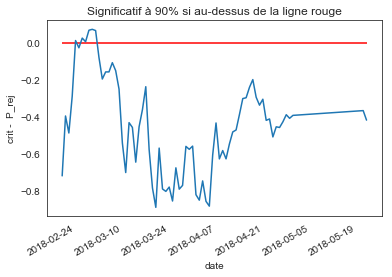

In [11]:
crit = 0.1 #90%

s =  - (P_rej - crit)  # il faut P_rej < crit, soit s > 0
   
s.plot(title="Significatif à 90% si au-dessus de la ligne rouge", ax=plt.gca())
plt.ylabel("crit -  P_rej")
plt.hlines(0,xmin = P_rej.index[0],xmax = P_rej.index[len(P_rej)-1], color = 'r')

print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier :")
print(round(sum((P_rej - crit < 0))/len(P_rej)*100,1))


Nous ajoutons au graphique précédent la ligne de significativité du test à 90%: le test est significatif si la p-valeur est plus petite qu'une certaine valeur critique, choisie ici à 0.1. Nous tracons donc la différence entre la valeur critique et la p-valeur du test qui doit être positive pour assurer la significativité du test.

Ici, ca ne l'est pas majoritairement (8.3% du temps), on peut affirmer que les deux versions du test ont un même taux de conversion.

##### Par semaine

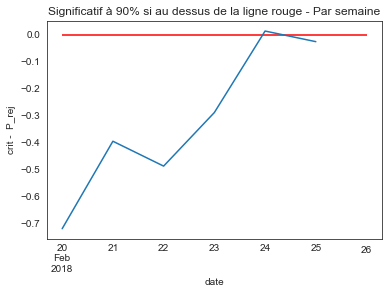

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
16.7


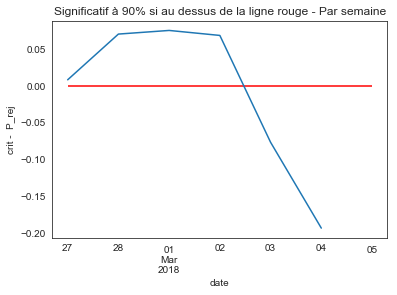

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
66.7


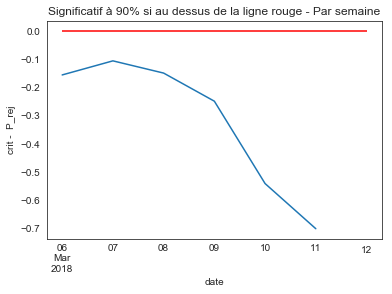

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


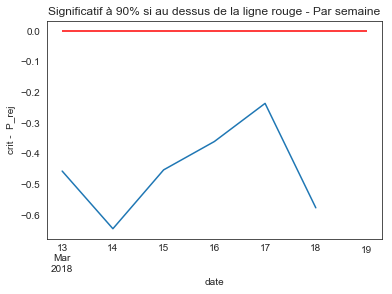

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


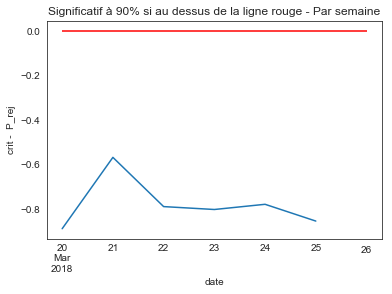

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


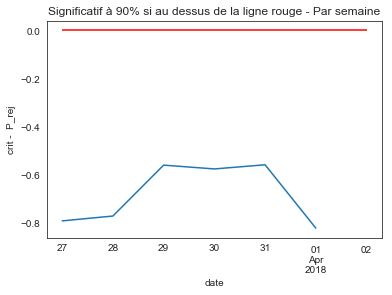

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


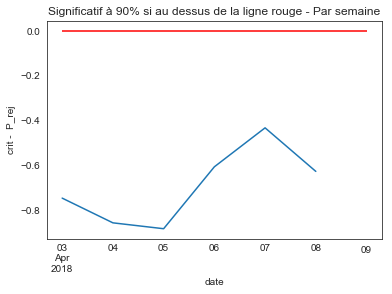

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


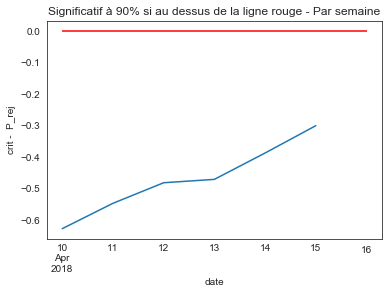

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


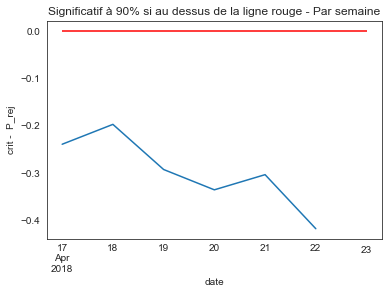

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


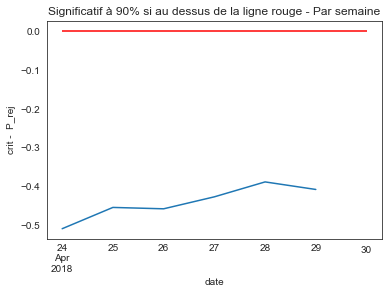

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
0.0


In [55]:
for i in range(len(s)//7):
    s[7*i:7*(i+1)-1].plot(title="Significatif à 90% si au dessus de la ligne rouge - Par semaine", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.index[7*i],xmax = P_rej.index[7*(i+1)-1], color = 'r')
    plt.show()
    # pourcentage de p_val significative ie < crit
    print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:")
    print(round(sum((s[7*i:7*(i+1)-1] > 0))/len(s[7*i:7*(i+1)-1])*100,1))
    


Nous tracons la significativité par semaine afin d'identifier des variations plus locales. Dans notre cas, le test reste toujours non significatif sauf pour la deuxième semaine qui correspond aux 8% de significativité observés plus haut. 

##### Par mois

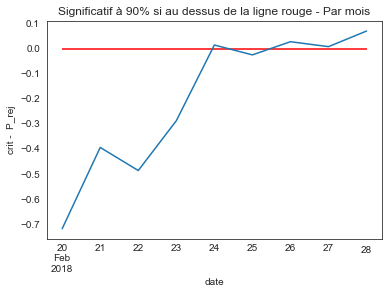

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
44.4


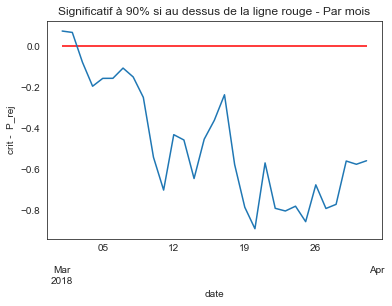

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
6.5


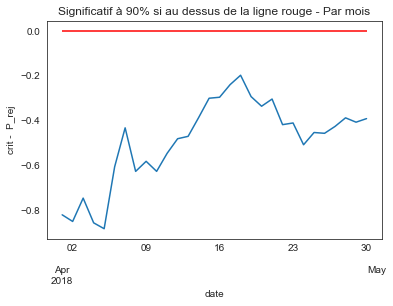

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
0.0


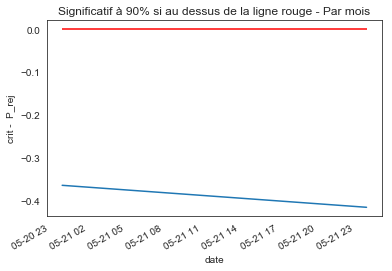

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
0.0


In [56]:
for month in ['2018-02', '2018-03','2018-04','2018-05']:
    s.loc[month].plot(title="Significatif à 90% si au dessus de la ligne rouge - Par mois", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.loc[month].index[0],xmax = P_rej.loc[month].index[len(P_rej.loc[month])-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:")
    print(round(sum((s.loc[month] > 0))/len(s.loc[month])*100,1))

Nous tracons de même la significativité par mois. Le test reste non significatif bien sûr.

#### b. Significativité à 80%

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier :
11.1


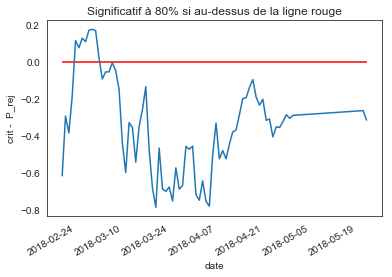

In [57]:
crit = 0.2 #80%

s = - (P_rej - crit)

s.plot(title="Significatif à 80% si au-dessus de la ligne rouge", ax=plt.gca())
plt.ylabel("crit -  P_rej")
plt.hlines(0,xmin = P_rej.index[0],xmax = P_rej.index[len(P_rej)-1], color = 'r')

print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier :")
print(round(sum((P_rej - crit <= 0))/len(P_rej)*100,1))

Nous recommencons l'analyse avec un seuil de significativité moins élevé : 80%. Le pourcentage de significativité augmente légèrement mais le test reste globalement non significatif.

##### Par semaine

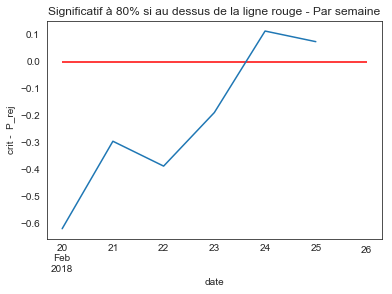

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
33.3


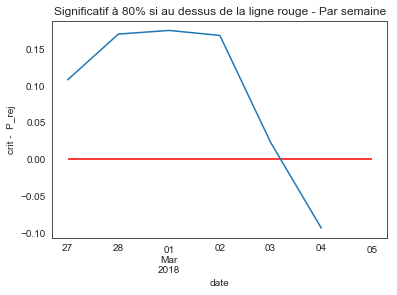

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
83.3


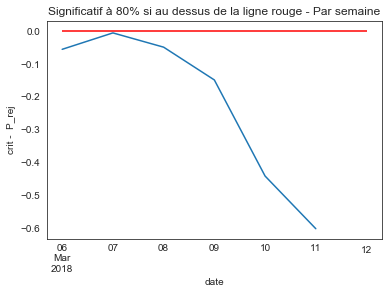

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


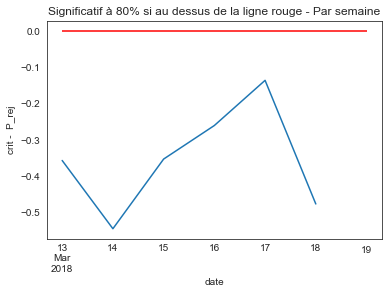

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


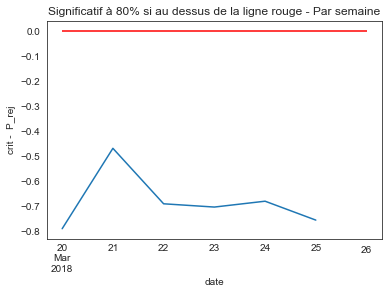

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


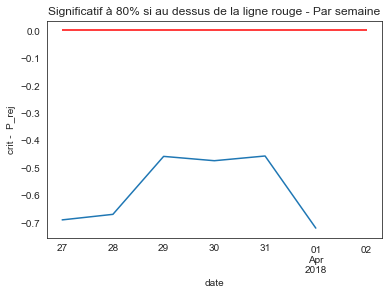

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


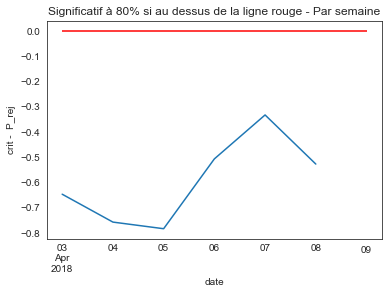

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


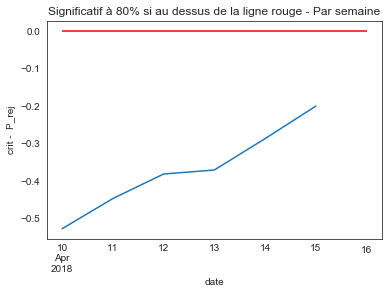

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


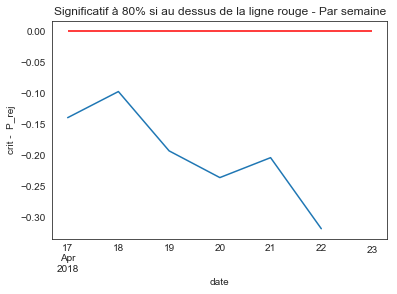

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


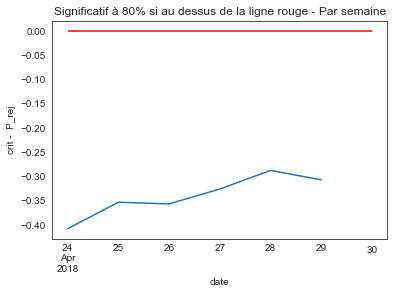

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
0.0


In [58]:
for i in range(len(s)//7):
    s[7*i:7*(i+1)-1].plot(title="Significatif à 80% si au dessus de la ligne rouge - Par semaine", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.index[7*i],xmax = P_rej.index[7*(i+1)-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:")
    print(round(sum((s[7*i:7*(i+1)-1] > 0))/len(s[7*i:7*(i+1)-1])*100,1))

##### Par mois


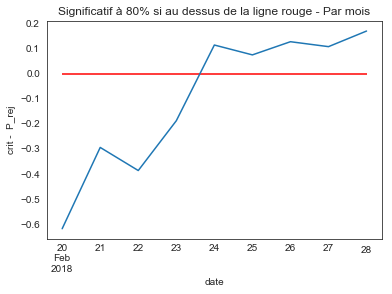

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
55.6


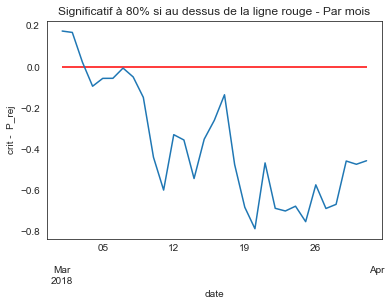

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
9.7


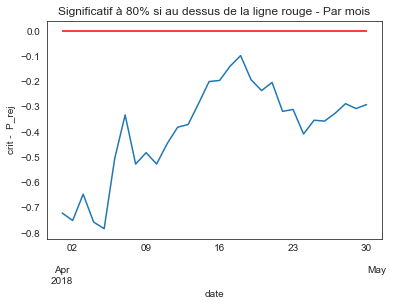

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
0.0


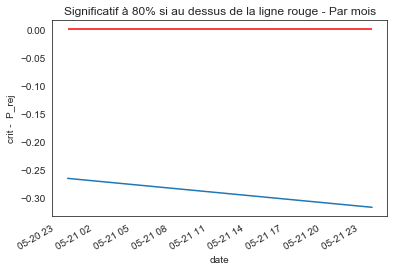

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
0.0


In [49]:
for month in ['2018-02', '2018-03','2018-04','2018-05']:
    s.loc[month].plot(title="Significatif à 80% si au dessus de la ligne rouge - Par mois", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.loc[month].index[0],xmax = P_rej.loc[month].index[len(P_rej.loc[month])-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:")
    print(round(sum((s.loc[month] > 0))/len(s.loc[month])*100,1))

Les variations de significativité sont plus fréquentes: on observe de 0 à 1 variation dans un mois ou une semaine. 

#### c. Tests Z cumulés

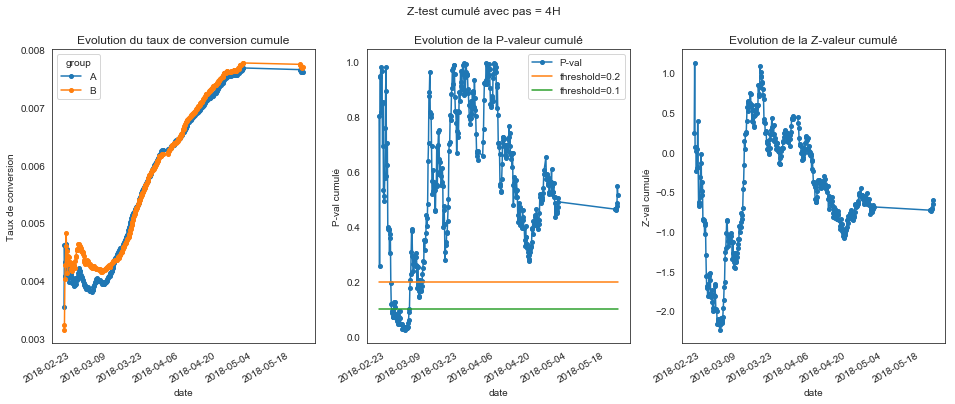

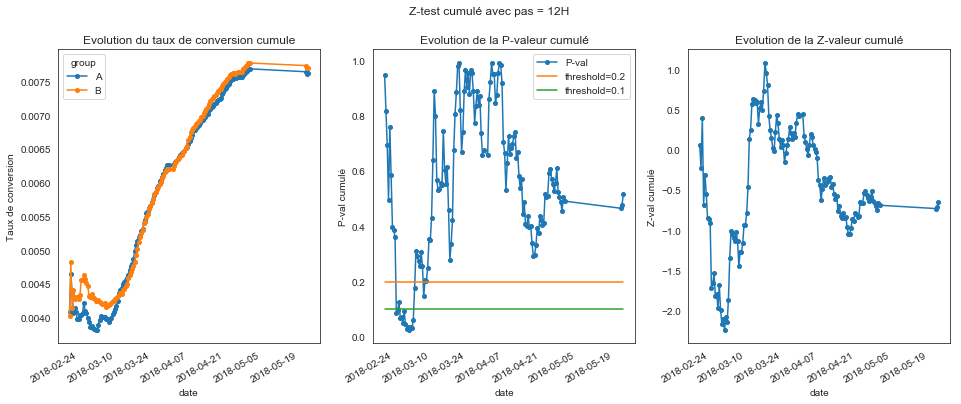

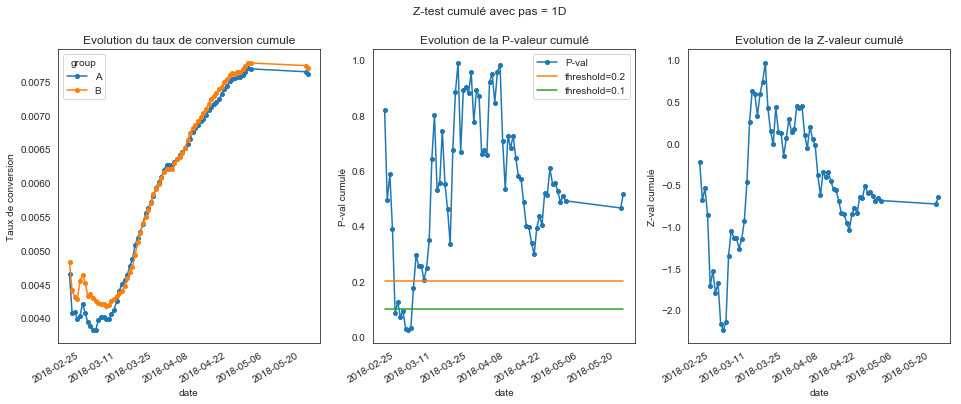

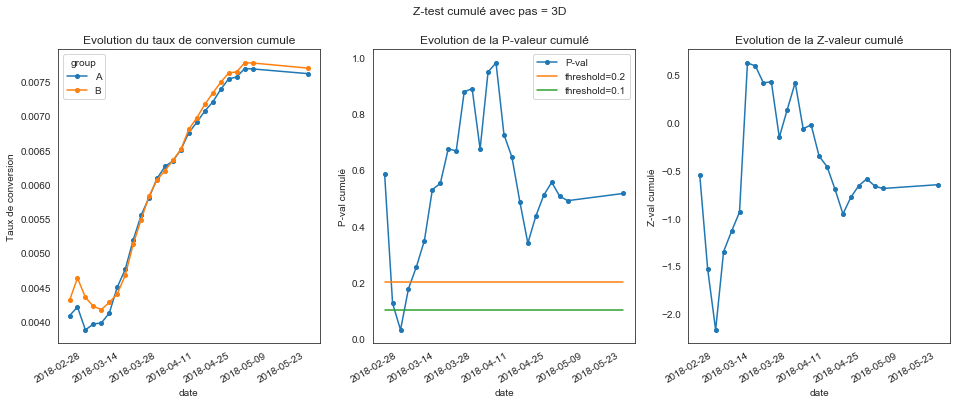

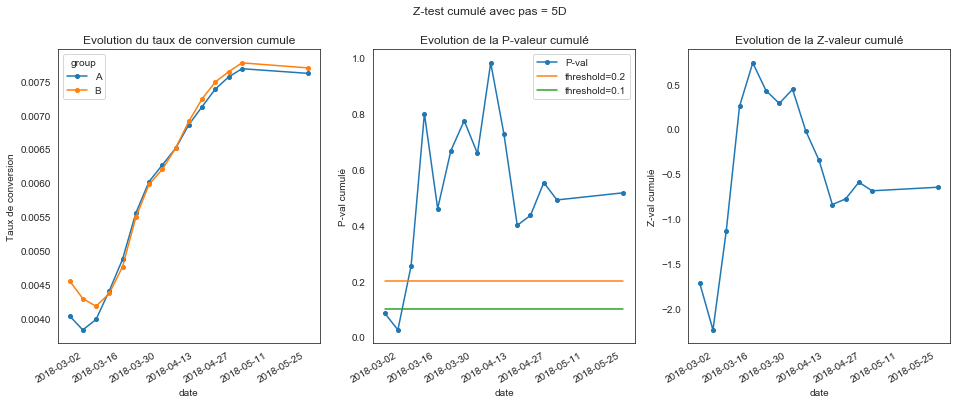

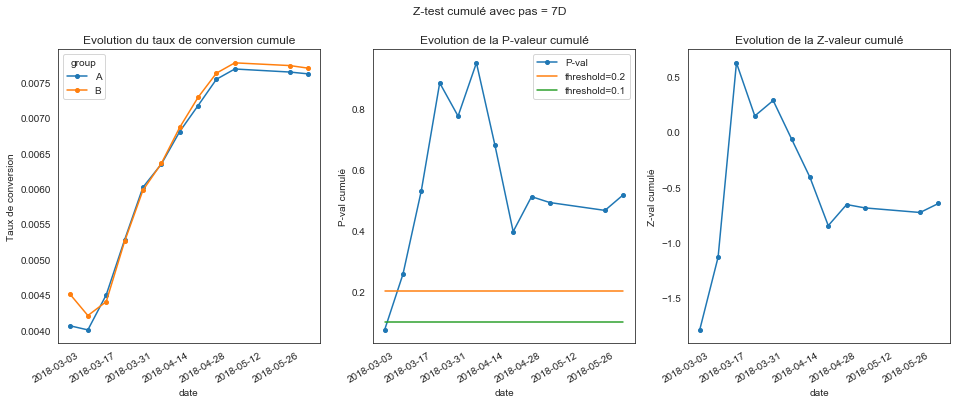

In [3]:
for freq in ["4H", "12H", "1D","3D", "5D", "7D"]:  # 1W does not work but 7D is ok
    Z_cum, P_rej, p_cum = testZ_cum_frequency(data, freq=freq)
    plot_testZ_cum_frequency(Z_cum, P_rej, p_cum, freq)

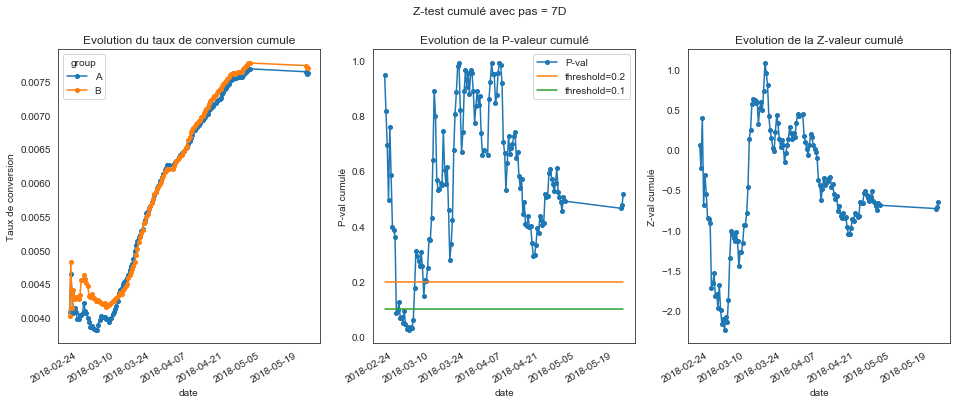

In [6]:
Z_cum, P_rej, p_cum = testZ_cum_frequency(data, freq="12H")
plot_testZ_cum_frequency(Z_cum, P_rej, p_cum, freq)

Ici, nous nous intéressons au Z-test du taux de conversion cumulé sur différents pas de temps (de plusieurs heures à plusieurs jours) afin de déceler des éventuelles différences de comportements en fonction du niveau d'agrégation. Le test est signifatif si la courbe de la P-valeur est en dessous des valeurs seuil 0.2 et 0.1. 

Le test est donc non significatif pour les différentes fréquences testées. On remarque peu de différences entre les pas de temps cumulés, la forme des courbes reste la même, seul le nombre de points varie puisqu'il y en a moins lorsque l'on agrège sur un plus grand intervalle de temps.

### 4. Stationnarité de la série de la différence relative des taux de conversion journaliers

In [5]:
adf_test(diff['is_conv'])
        

,Results of Augmented Dickey-Fuller test:
test statistic,-1.019875e+01
p-value,6.048428e-18
# of lags,0.000000e+00
# of observations,7.100000e+01
Critical Value (1%),-3.526005e+00
Critical Value (5%),-2.903200e+00
Critical Value (10%),-2.588995e+00


La stationnarité  de  la  série  est  évaluée  grâce  au  test  de  Dickey-Fuller,  ce  qui
engendrera ou non des transformations diférentielle ou logarithmique sur la série. L’intérêt de cette
étude est de déterminer si la série est stationnaire et la tranformer si ce n’est pas le cas. En effet,
la moyenne d’une série stationnaire ne dépend pas du temps, ni même sa fonction de convariance, il est donc plus aisé de manipuler des séries stationnaires.

Ici, la statistique de test est inférieure à la valeur critique à 1%, la série est stationnaire. Cependant, le test est négatif dans le sens où on ne peut conclure sur la supériorité d'une des deux versions de la bannière de pub.

### 5. Modèles ARMA

Nous tentons ici de trouver un modèle ARMA pour les séries temporelles Z et P avec un pas de 1 jour. Identifier le meilleur modèle correspondant aux données nous permettra d'appliquer certaines propriétés connues dans le but de pouvoir prédire l'instant d'arrêt du test entre les deux versions (i.e. prédire aue l'évolution sera stable à partir de cet instant d'arrêt).

In [26]:
Z_cum, P_rej, p_cum = testZ_cum_frequency(data, freq='1D')

#### a. Z statistique 

## Analyse classique d'une ST

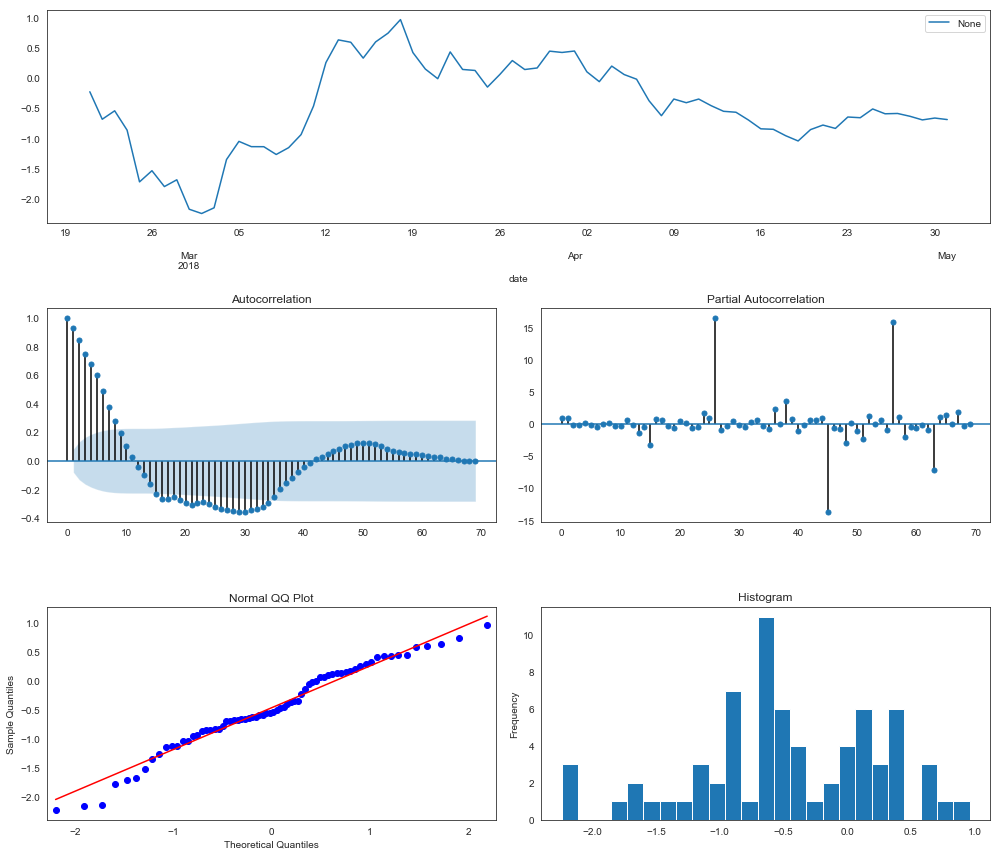

## Décomposition de la série de temps selon modèle multiplicatif

## Test de Dickey-Fuller



Multiplicative seasonality is not appropriate for zero and negative values


,Results of Augmented Dickey-Fuller test:
test statistic,-3.313419
p-value,0.014289
# of lags,8.000000
# of observations,61.000000
Critical Value (1%),-3.542413
Critical Value (5%),-2.910236
Critical Value (10%),-2.592745


In [27]:
analyserZP(Z_cum)

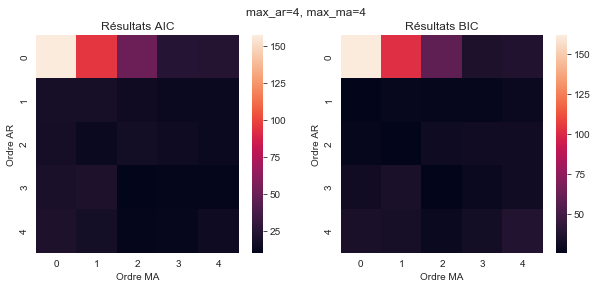

AIC meilleur modèle : AR=3, MA=2, AIC=10.076321916772827 
BIC meilleur modèle : AR=2, MA=1, BIC=25.5940892527334 


In [28]:

##################################### PARAMETRES #####################################
max_ar = 4
max_ma = 4
######################################################################################

order_select = sto.arma_order_select_ic(
    Z_cum.values,
    ic = ['aic', 'bic'],
    max_ar=max_ar, 
    max_ma=max_ma
)

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.heatmap(order_select["aic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats AIC")

plt.subplot(1, 2, 2)
sns.heatmap(order_select["bic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats BIC")

plt.suptitle(f"max_ar={max_ar}, max_ma={max_ma}")
plt.show();

aic_min_order = order_select["aic_min_order"]
bic_min_order = order_select["bic_min_order"]
print(
    "AIC meilleur modèle : AR={}, MA={}, AIC={} ".format(
        aic_min_order[0], aic_min_order[1], 
        order_select['aic'].loc[aic_min_order]
    )
)
print(
    "BIC meilleur modèle : AR={}, MA={}, BIC={} ".format(
        bic_min_order[0], bic_min_order[1], 
        order_select['bic'].loc[bic_min_order]
    )
)

# Meilleur modèle selon AIC

## Fit du modèle



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   70
Model:                     ARMA(3, 2)   Log Likelihood                   1.962
Method:                       css-mle   S.D. of innovations              0.223
Date:                Sat, 26 Jan 2019   AIC                             10.076
Time:                        19:33:44   BIC                             25.816
Sample:                             0   HQIC                            16.328
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4535      0.302     -1.500      0.138      -1.046       0.139
ar.L1.y        0.6171      0.127      4.857      0.000       0.368       0.866
ar.L2.y       -0.2161      0.164     -1.316      0

## Erreurs

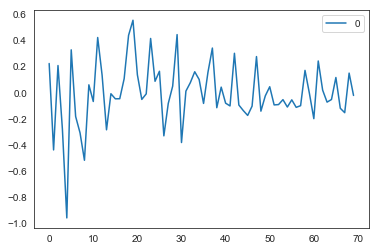

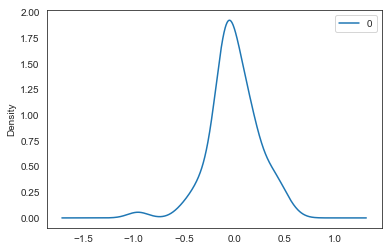

               0
count  70.000000
mean   -0.003332
std     0.241225
min    -0.956903
25%    -0.107221
50%    -0.034269
75%     0.136820
max     0.554870


# Meilleur modèle selon BIC

## Fit du modèle



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   70
Model:                     ARMA(2, 1)   Log Likelihood                  -2.176
Method:                       css-mle   S.D. of innovations              0.241
Date:                Sat, 26 Jan 2019   AIC                             14.352
Time:                        19:33:45   BIC                             25.594
Sample:                             0   HQIC                            18.817
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3048      0.068     -4.476      0.000      -0.438      -0.171
ar.L1.y        1.9232      0.034     55.895      0.000       1.856       1.991
ar.L2.y       -0.9442      0.036    -26.487      0

## Erreurs

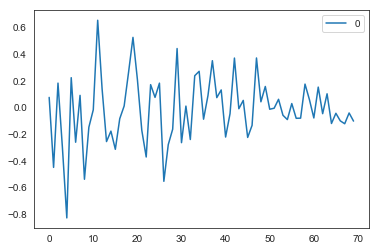

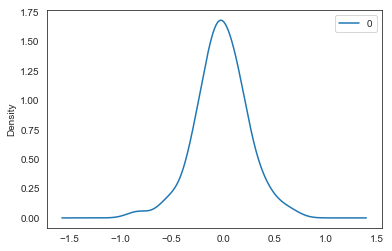

               0
count  70.000000
mean   -0.016374
std     0.250011
min    -0.827633
25%    -0.144521
50%    -0.015473
75%     0.136769
max     0.653331


In [29]:
display(Markdown("# Meilleur modèle selon AIC"))
testARMA(Z_cum.values, p=aic_min_order[0], d=0, q=aic_min_order[1])

display(Markdown("# Meilleur modèle selon BIC"))
testARMA(Z_cum.values, p=bic_min_order[0], d=0, q=bic_min_order[1])

ARMA(2,1) semble correspondre au mieux au vu des p-valeurs. Les p-valeurs des coefficients sont inférieures au seuil 0,2 et quasiment à celui de 0,1. Les erreurs du modèle suivent une gaussienne centrée en 0.

Attention,  0  journées avec NaN
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   70
Model:                     ARMA(2, 1)   Log Likelihood                  -2.176
Method:                       css-mle   S.D. of innovations              0.241
Date:                Sat, 26 Jan 2019   AIC                             14.352
Time:                        19:33:52   BIC                             25.594
Sample:                    02-21-2018   HQIC                            18.817
                         - 05-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3048      0.068     -4.476      0.000      -0.438      -0.171
ar.L1.y        1.9232      0.034     55.895      0.000       1.856       1.991
ar.L2.y       -0.94

## Erreurs

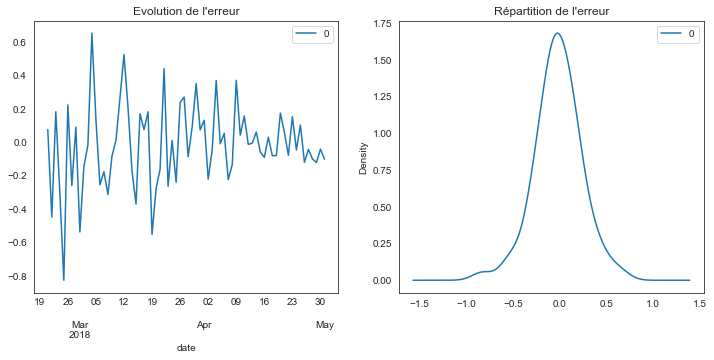

In [30]:
##################################### PARAMETRES #####################################
p = bic_min_order[0]  # AR(p)
d = 0  # d=0 pour ARMA
q = bic_min_order[1]  # MA(q)
p, q = 2, 1
######################################################################################

# asfreq permettra de faire des predictions et de les afficher facilement...
# ffill au cas ou il manque des jours... 
# mais faire très attention aux datasets où il manque une grosse plage de journées!
# genre a1c1 vers la fin... donc je mets une limite au nb max de jours manquants
print("Attention, ", Z_cum.asfreq("D").isna().sum(), " journées avec NaN")

model_z = ARIMA(Z_cum.asfreq("D").fillna(method="ffill"), order=(p, d, q), freq="D").fit()
# model_fit = model.fit(disp=0)
print(model_z.summary())
# print(model_fit.summary())
display(Markdown("## Erreurs"))
print('\n')
residuals = DataFrame(model_z.resid)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
residuals.plot(ax=plt.gca())
plt.title("Evolution de l'erreur")

plt.subplot(1, 2, 2)
residuals.plot(kind='kde', ax=plt.gca())
plt.title("Répartition de l'erreur")

plt.show()

#### b. P valeur

## Analyse classique d'une ST

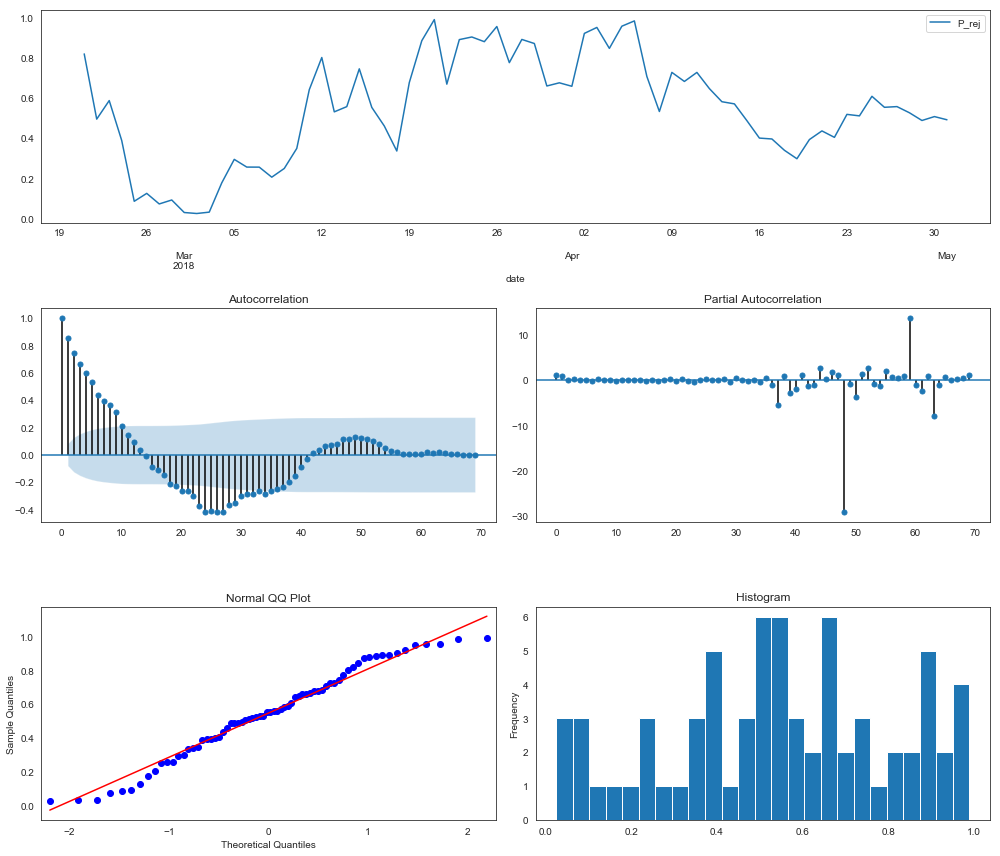

## Décomposition de la série de temps selon modèle multiplicatif

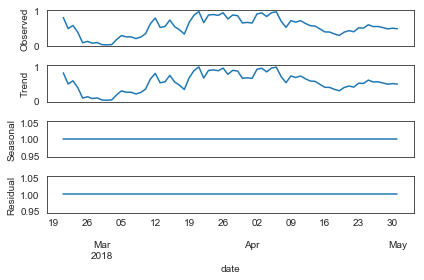

## Test de Dickey-Fuller

,Results of Augmented Dickey-Fuller test:
test statistic,-2.356977
p-value,0.154249
# of lags,0.000000
# of observations,69.000000
Critical Value (1%),-3.528890
Critical Value (5%),-2.904440
Critical Value (10%),-2.589656


In [31]:
analyserZP(P_rej)

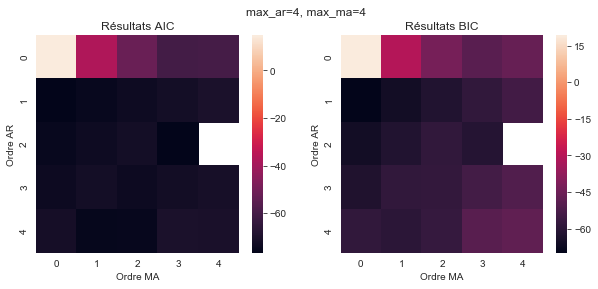

AIC meilleur modèle : AR=1, MA=0, AIC=-76.63854782305589 
BIC meilleur modèle : AR=1, MA=0, BIC=-69.89306209690781 


In [32]:

##################################### PARAMETRES #####################################
max_ar = 4
max_ma = 4
######################################################################################

order_select = sto.arma_order_select_ic(
    P_rej.values,
    ic = ['aic', 'bic'],
    max_ar=max_ar, 
    max_ma=max_ma
)

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.heatmap(order_select["aic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats AIC")

plt.subplot(1, 2, 2)
sns.heatmap(order_select["bic"])
plt.xlabel("Ordre MA")
plt.ylabel("Ordre AR")
plt.title("Résultats BIC")

plt.suptitle(f"max_ar={max_ar}, max_ma={max_ma}")
plt.show();

aic_min_order = order_select["aic_min_order"]
bic_min_order = order_select["bic_min_order"]
print(
    "AIC meilleur modèle : AR={}, MA={}, AIC={} ".format(
        aic_min_order[0], aic_min_order[1], 
        order_select['aic'].loc[aic_min_order]
    )
)
print(
    "BIC meilleur modèle : AR={}, MA={}, BIC={} ".format(
        bic_min_order[0], bic_min_order[1], 
        order_select['bic'].loc[bic_min_order]
    )
)

# Meilleur modèle selon AIC

## Fit du modèle



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   70
Model:                     ARMA(1, 0)   Log Likelihood                  41.319
Method:                       css-mle   S.D. of innovations              0.133
Date:                Sat, 26 Jan 2019   AIC                            -76.639
Time:                        19:34:34   BIC                            -69.893
Sample:                             0   HQIC                           -73.959
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5622      0.102      5.497      0.000       0.362       0.763
ar.L1.y        0.8562      0.059     14.599      0.000       0.741       0.971
                                    Roots         

## Erreurs

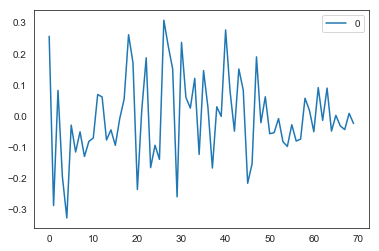

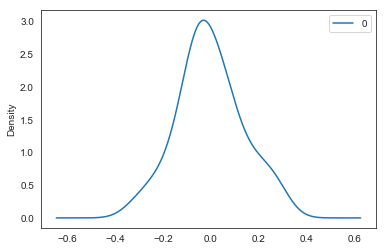

               0
count  70.000000
mean   -0.003134
std     0.136339
min    -0.327130
25%    -0.081164
50%    -0.017613
75%     0.078182
max     0.307724


# Meilleur modèle selon BIC

## Fit du modèle



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   70
Model:                     ARMA(1, 0)   Log Likelihood                  41.319
Method:                       css-mle   S.D. of innovations              0.133
Date:                Sat, 26 Jan 2019   AIC                            -76.639
Time:                        19:34:35   BIC                            -69.893
Sample:                             0   HQIC                           -73.959
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5622      0.102      5.497      0.000       0.362       0.763
ar.L1.y        0.8562      0.059     14.599      0.000       0.741       0.971
                                    Roots         

## Erreurs

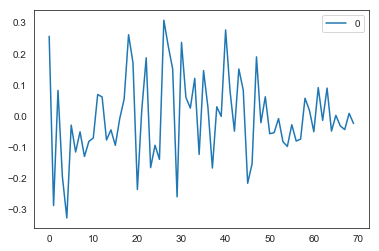

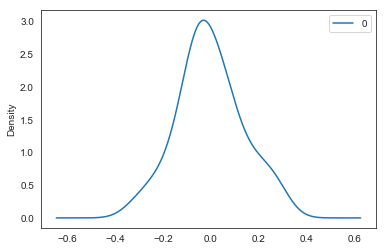

               0
count  70.000000
mean   -0.003134
std     0.136339
min    -0.327130
25%    -0.081164
50%    -0.017613
75%     0.078182
max     0.307724


In [33]:

display(Markdown("# Meilleur modèle selon AIC"))
testARMA(P_rej.values, p=aic_min_order[0], d=0, q=aic_min_order[1])

display(Markdown("# Meilleur modèle selon BIC"))
testARMA(P_rej.values, p=bic_min_order[0], d=0, q=bic_min_order[1])

AR(1) semble correspondre au mieux et contient moins de paramètres (à privilégier). Les p-valeurs des coefficients sont inférieures au seuil 0,2 et quasiment à celui de 0,1. Les erreurs du modèle suivent une gaussienne centrée en 0.

À tester avec d'autres fréquences?

Attention,  0  journées avec NaN
                              ARMA Model Results                              
Dep. Variable:                  P_rej   No. Observations:                   70
Model:                     ARMA(1, 0)   Log Likelihood                  41.319
Method:                       css-mle   S.D. of innovations              0.133
Date:                Sat, 26 Jan 2019   AIC                            -76.639
Time:                        19:34:49   BIC                            -69.893
Sample:                    02-21-2018   HQIC                           -73.959
                         - 05-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5622      0.102      5.497      0.000       0.362       0.763
ar.L1.P_rej     0.8562      0.059     14.599      0.000       0.741       0.971
               

## Erreurs

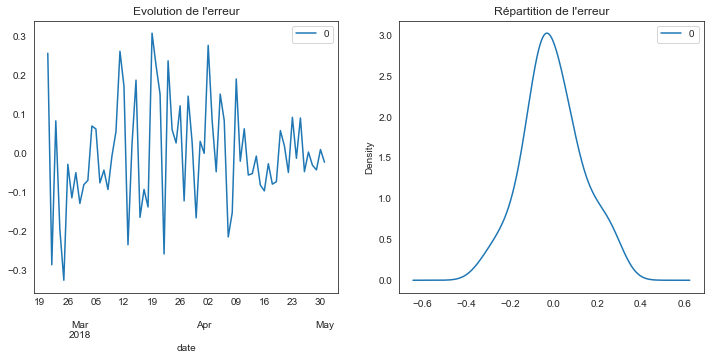

In [34]:
##################################### PARAMETRES #####################################
p = bic_min_order[0]  # AR(p)
d = 0  # d=0 pour ARMA
q = bic_min_order[1]  # MA(q)
p, q = 1, 0
######################################################################################

# asfreq permettra de faire des predictions et de les afficher facilement...
# ffill au cas ou il manque des jours... 
# mais faire très attention aux datasets où il manque une grosse plage de journées!
# genre a1c1 vers la fin... donc je mets une limite au nb max de jours manquants
print("Attention, ", P_rej.asfreq("D").isna().sum(), " journées avec NaN")

model_p = ARIMA(P_rej.asfreq("D").fillna(method="ffill"), order=(p, d, q), freq="D").fit()
# model_fit = model.fit(disp=0)
print(model_p.summary())
# print(model_fit.summary())
display(Markdown("## Erreurs"))
print('\n')
residuals = DataFrame(model_p.resid)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
residuals.plot(ax=plt.gca())
plt.title("Evolution de l'erreur")

plt.subplot(1, 2, 2)
residuals.plot(kind='kde', ax=plt.gca())
plt.title("Répartition de l'erreur")

plt.show()

#### c. Regarder à un temps t < tmax

L'idée est ici de tronquer la série chronologique de Z ou P à un instant t avant la fin de la campagne et de lui faire correspondre un modèle dans le but de savoir s'il est possible d'arrêter le test avant. (question budgétaire)

In [11]:
t = round(0.75*len(Z_cum))
Z_tronq = Z_cum[0:t]
P_tronq = P_rej[0:t]

In [12]:
print("Z_tronq")
sto.arma_order_select_ic(Z_tronq,ic = ['aic', 'bic'],max_ar = 4,max_ma = 4)

Z_tronq


{'aic':             0          1          2          3          4
 0  133.437202  86.797322  51.682022  32.146910  31.058912
 1   28.856590  29.136088  23.000977  22.533569  23.318498
 2   28.737101  26.038209  24.321634  26.415409  23.915652
 3   30.525019  31.828682  21.771043  23.416958  27.775696
 4   31.706071  29.544098  22.232536  22.720366  19.786750,
 'bic':             0          1          2          3          4
 0  137.415170  92.764274  59.637958  42.091830  42.992816
 1   34.823542  37.092025  32.945897  34.467473  37.241386
 2   36.693037  35.983129  36.255539  40.338297  39.827525
 3   40.469939  43.762586  35.693931  39.328831  45.676552
 4   43.639975  43.466987  38.144409  40.621222  39.676591,
 'aic_min_order': (4, 4),
 'bic_min_order': (1, 2)}

In [13]:
print("P_tronq")
sto.arma_order_select_ic(P_tronq,ic = ['aic', 'bic'],max_ar = 4,max_ma = 4)

P_tronq


{'aic':            0          1          2          3          4
 0  23.377075 -16.324507 -26.609998 -32.702098 -31.637674
 1 -45.744040 -43.754414 -42.576163 -40.882024 -38.959173
 2 -43.751136 -42.494106 -42.159369 -44.308478 -43.006031
 3 -42.663231 -40.832491 -40.288564 -40.292233 -38.425398
 4 -40.701964 -42.872148 -43.067331 -36.921268        NaN,
 'bic':            0          1          2          3          4
 0  27.355043 -10.357555 -18.654062 -22.757178 -19.703770
 1 -39.777088 -35.798478 -32.631243 -28.948120 -25.036285
 2 -35.795200 -32.549186 -30.225464 -30.385590 -27.094159
 3 -32.718311 -28.898587 -26.365676 -24.380361 -20.524542
 4 -28.768059 -28.949259 -27.155459 -19.020411        NaN,
 'aic_min_order': (1, 0),
 'bic_min_order': (1, 0)}

La série tronquée des p-valeurs suit le même modèle que la série complète => arrêter test plus tôt?

### 6. Prédiction

Quelles sont les prévisions selon le modèle sur les données existantes (in-sample)? 
On réalise des prédictions de `pred_start` à `pred_end` (None donne la fin de la période)
On peut distinguer deux types de prévisions : 
+ 1-step-ahead : on utilise toutes les données jusqu'à J-1
+ Dynamic : à partir de pred_start on utilise les variables prédites comme entrées

#### a. Z_cum

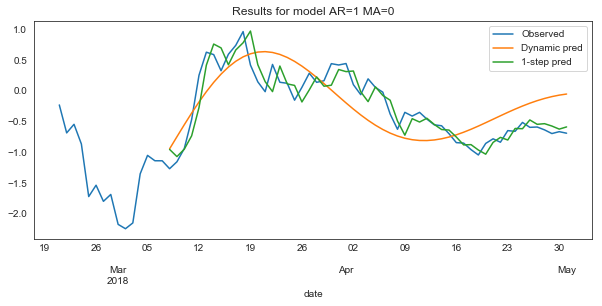

In [35]:
##################################### PARAMETRES #####################################
pred_start = 45  # debut des predictions
pred_end = 100  # fin des predictions
pred_start = 15
pred_end = None
######################################################################################

# Différence entre dynamic predictions & non-dynamic
#     The `dynamic` keyword affects in-sample prediction. If dynamic
#     is False, then the in-sample lagged values are used for
#     prediction. If `dynamic` is True, then in-sample forecasts are
#     used in place of lagged dependent variables. The first forecasted
#     value is `start`.
# Dans notre cas pred_start=len(Z_cum)+1 donne donc les 
# même résultats pour dynamic & one_step_head, la différence est uniquement au sein du in-sample

dates = Z_cum.index
dynamic_predictions = model_z.predict(start=pred_start, end=pred_end, dynamic=True)
one_step_ahead_predictions = model_z.predict(start=pred_start, end=pred_end, dynamic=False)

plt.figure(figsize=(10, 4))
Z_cum.plot(ax=plt.gca(), label="Observed")
dynamic_predictions.plot(ax=plt.gca(), label="Dynamic pred")
one_step_ahead_predictions.plot(ax=plt.gca(), label="1-step pred")
plt.legend()
plt.title(f"Results for model AR={p} MA={q}")
plt.show()

#### b. P_rej

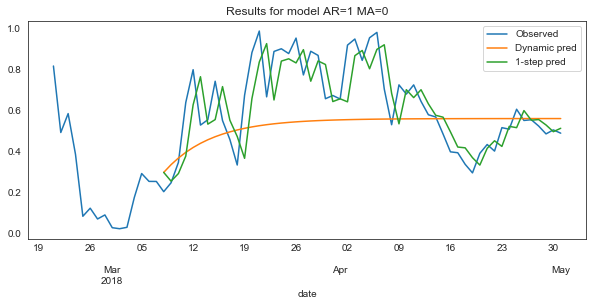

In [36]:
##################################### PARAMETRES #####################################
pred_start = 45  # debut des predictions
pred_end = 100  # fin des predictions
pred_start = 15
pred_end = None
######################################################################################

# Différence entre dynamic predictions & non-dynamic
#     The `dynamic` keyword affects in-sample prediction. If dynamic
#     is False, then the in-sample lagged values are used for
#     prediction. If `dynamic` is True, then in-sample forecasts are
#     used in place of lagged dependent variables. The first forecasted
#     value is `start`.
# Dans notre cas pred_start=len(Z_cum)+1 donne donc les 
# même résultats pour dynamic & one_step_head, la différence est uniquement au sein du in-sample

dates = P_rej.index
dynamic_predictions = model_p.predict(start=pred_start, end=pred_end, dynamic=True)
one_step_ahead_predictions = model_p.predict(start=pred_start, end=pred_end, dynamic=False)

plt.figure(figsize=(10, 4))
P_rej.plot(ax=plt.gca(), label="Observed")
dynamic_predictions.plot(ax=plt.gca(), label="Dynamic pred")
one_step_ahead_predictions.plot(ax=plt.gca(), label="1-step pred")
plt.legend()
plt.title(f"Results for model AR={p} MA={q}")
plt.show()

On remarque que la prévision à 1-pas est bonne pour la p-valeur, contrairement à la prévision dynamique. Sur la Z_valeur, la prévision à un pas est meilleure également, la prévision dynamique suit mieux la courbe observée que pour la p_valeur.